<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Thinkful_prep_dataset_for_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U seaborn

#restart runtime to get upgraded seaborn graphs

    100% |████████████████████████████████| 215kB 6.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
from sklearn import datasets

In [0]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

In [0]:
df = pd.read_csv('dota2 heroes.csv')

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/zdwhite/Thinkful-Unit-2/master/dota2%20heroes.csv')



In [0]:
df.set_index('HERO',inplace=True)



1.  Select an outcome variable
2.  Pick four variables (one to two categorical, three to four continuous) for features
3.  Explore the variables using the univariate and bivariate methods
4.  Create ten new features and explain
5.  Filtering methods to select the five best features



In [6]:
df.head()

,A,STR,STR+,STR 25,AGI,AGI+,AGI 25,INT,INT+,INT 25,...,VS-D,VS-N,TR,COL,HP/S,L,Pick rate,Win rate,KDA Ratio4,Match Duration4
HERO,,,,,,,,,,,,,,,,,,,,,
Abaddon,str,23,2.6,85.4,17,1.5,53.0,21,2.0,69.0,...,1800,800,0.5,24,1.50,2,0.027,0.524,2.86,38.583333
Alchemist,str,25,2.1,75.4,16,1.2,44.8,25,1.8,68.2,...,1800,800,0.6,24,1.50,2,0.064,0.523,3.03,38.016667
Ancient Apparition,int,20,1.7,60.8,20,2.2,72.8,23,2.6,85.4,...,1800,800,0.6,24,1.50,2,0.069,0.519,2.77,40.750000
Anti-Mage,agl,23,1.3,54.2,22,2.8,89.2,12,1.8,55.2,...,1800,800,0.5,24,1.75,2,0.124,0.553,3.09,38.483333
Arc Warden,agl,25,3.0,97.0,15,1.8,58.2,24,2.6,86.4,...,1800,800,0.6,24,1.75,2,0.056,0.506,3.19,40.416667


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, Abaddon to Zeus
Data columns (total 31 columns):
A                  116 non-null object
STR                116 non-null int64
STR+               116 non-null float64
STR 25             116 non-null float64
AGI                116 non-null int64
AGI+               116 non-null float64
AGI 25             116 non-null float64
INT                116 non-null int64
INT+               116 non-null float64
INT 25             116 non-null float64
T                  116 non-null int64
T+                 116 non-null float64
T25                116 non-null float64
MS                 116 non-null int64
AR                 116 non-null float64
DMG (MIN)          116 non-null int64
DMG (MAX)          116 non-null int64
RG                 116 non-null int64
BAT                116 non-null float64
ATK PT             116 non-null float64
ATK BS             116 non-null float64
VS-D               116 non-null int64
VS-N               116 non-null 

In [0]:
#For this Exercize we'll compare 'Strength' based heroes against 'Agility' based heroes
# This is to say the heroes primary stat is either STR or AGI

df_compare=df.loc[((df['A'])=='str')|(df['A']=='agl')]


df_compare = df_compare.loc[:, df_compare.columns != 'A']
#df_compare = df_compare.loc[:, df_compare.columns != 'HERO']


In [9]:
df_compare.head()

,STR,STR+,STR 25,AGI,AGI+,AGI 25,INT,INT+,INT 25,T,...,VS-D,VS-N,TR,COL,HP/S,L,Pick rate,Win rate,KDA Ratio4,Match Duration4
HERO,,,,,,,,,,,,,,,,,,,,,
Abaddon,23,2.6,85.4,17,1.5,53.0,21,2.0,69.0,61,...,1800,800,0.5,24,1.50,2,0.027,0.524,2.86,38.583333
Alchemist,25,2.1,75.4,16,1.2,44.8,25,1.8,68.2,66,...,1800,800,0.6,24,1.50,2,0.064,0.523,3.03,38.016667
Anti-Mage,23,1.3,54.2,22,2.8,89.2,12,1.8,55.2,57,...,1800,800,0.5,24,1.75,2,0.124,0.553,3.09,38.483333
Arc Warden,25,3.0,97.0,15,1.8,58.2,24,2.6,86.4,64,...,1800,800,0.6,24,1.75,2,0.056,0.506,3.19,40.416667
Axe,25,2.8,92.2,20,2.2,72.8,18,1.6,56.4,63,...,1800,800,0.6,24,4.25,2,0.229,0.535,2.39,39.183333


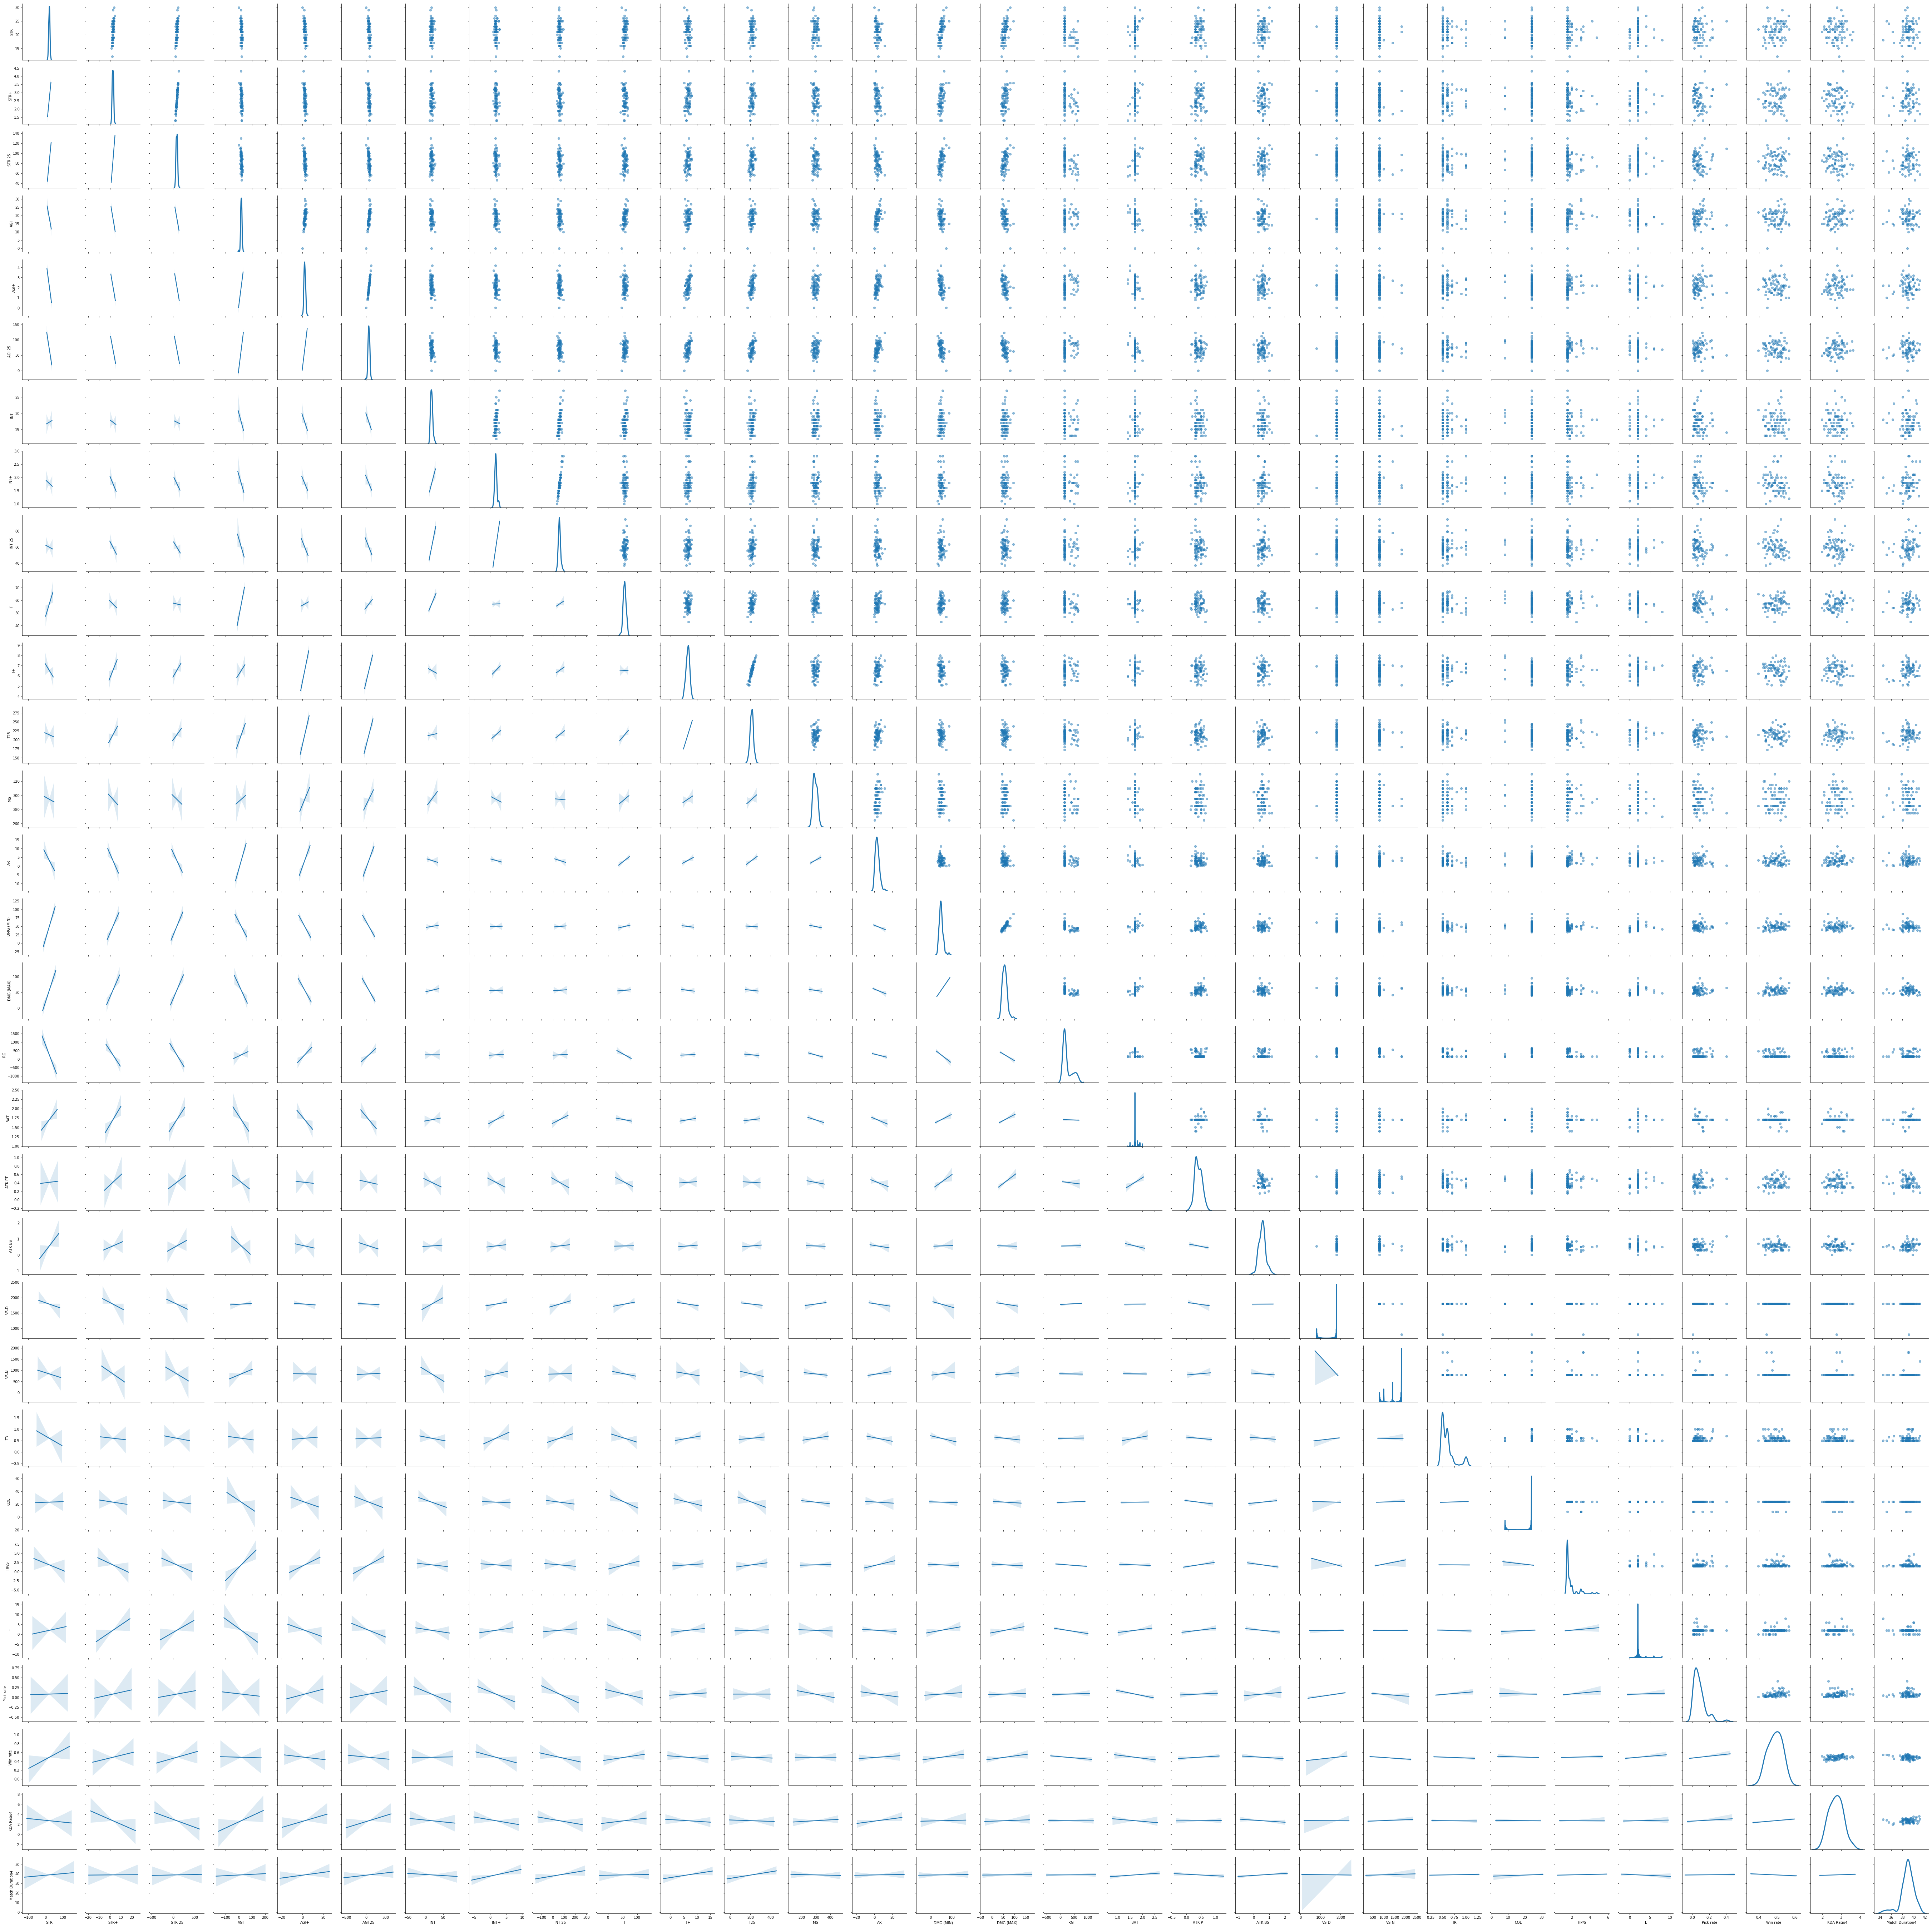

In [10]:
g = sns.PairGrid(df_compare, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      STR      STR+    STR 25       AGI      AGI+    AGI 25  \
STR              1.000000  0.600992  0.723041 -0.418373 -0.579265 -0.580872   
STR+             0.600992  1.000000  0.986671 -0.509380 -0.504436 -0.537913   
STR 25           0.723041  0.986671  1.000000 -0.525442 -0.553926 -0.583188   
AGI             -0.418373 -0.509380 -0.525442  1.000000  0.644612  0.764589   
AGI+            -0.579265 -0.504436 -0.553926  0.644612  1.000000  0.985604   
AGI 25          -0.580872 -0.537913 -0.583188  0.764589  0.985604  1.000000   
INT              0.035685 -0.050692 -0.036548 -0.234164 -0.241261 -0.255180   
INT+            -0.057730 -0.166144 -0.155354 -0.223488 -0.194128 -0.213084   
INT 25          -0.038092 -0.154473 -0.141268 -0.256315 -0.233711 -0.253713   
T                0.314184 -0.106721 -0.028274  0.533096  0.071123  0.177855   
T+              -0.145481  0.248904  0.185511  0.148344  0.579429  0.521292   
T25             -0.045577  0.206632  0.169315  0.301

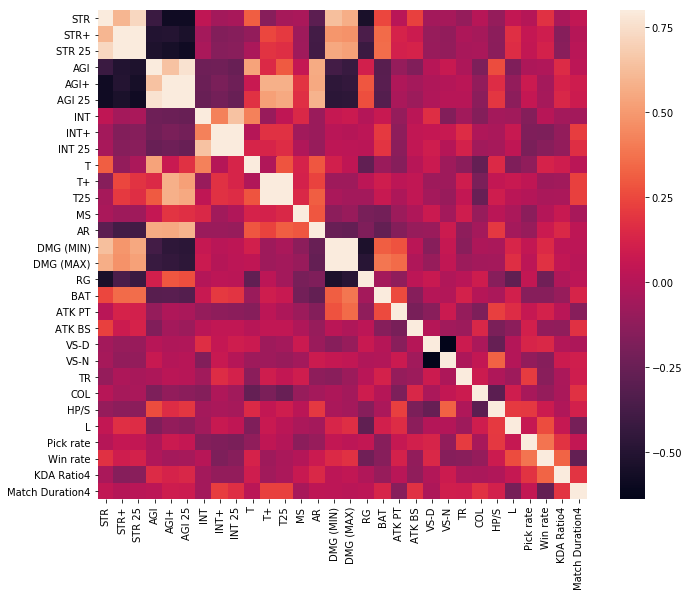

In [11]:
corrmat = df_compare.corr()
print(corrmat)


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Looking at the heat map above let's create a short list of the variables that are both highly correlated to one another and do not correlate well to winrate.



1.   STR, STR+, STR 25
2.   AGI, AGI+, AGI 25
3.   INT, INT+, INT 25
4.   T+, T25
5.   DMG(min), DMG(max)

We'll combine the columns in each list item simply by applying the same logic in the feature engineering section of the Thinkful curriculum.




Notes for more work, from here pair down columns that are or have high correlations, Keep following the feature engineering page.

Next follow the PCA outline to pair down columns even further

In [12]:
#Thinkful way

# Str first

#Obviously I could turn this into a function but i'm short on time so i'm just donig the quick and dirty method
means = df_compare[['STR','STR+','STR 25']].mean(axis=0)
stds = df_compare[['STR','STR+','STR 25']].std(axis=0)
df_compare['STR_C'] = ((df_compare[['STR','STR+','STR 25']] - means) / stds).mean(axis=1)

means = df_compare[['AGI','AGI+','AGI 25']].mean(axis=0)
stds = df_compare[['AGI','AGI+','AGI 25']].std(axis=0)
df_compare['AGI_C'] = ((df_compare[['AGI','AGI+','AGI 25']] - means) / stds).mean(axis=1)

means = df_compare[['INT','INT+','INT 25']].mean(axis=0)
stds = df_compare[['INT','INT+','INT 25']].std(axis=0)
df_compare['INT_C'] = ((df_compare[['INT','INT+','INT 25']] - means) / stds).mean(axis=1)

means = df_compare[['T+','T25']].mean(axis=0)
stds = df_compare[['T+','T25']].std(axis=0)
df_compare['STATS_C'] = ((df_compare[['T+','T25']] - means) / stds).mean(axis=1)

means = df_compare[['DMG (MIN)','DMG (MAX)']].mean(axis=0)
stds = df_compare[['DMG (MIN)','DMG (MAX)']].std(axis=0)
df_compare['DMG_C'] = ((df_compare[['DMG (MIN)','DMG (MAX)']] - means) / stds).mean(axis=1)


df_compare=df_compare.drop(['STR','STR+','STR 25','AGI','AGI+','AGI 25','INT','INT+','INT 25','T+','T25','DMG (MIN)','DMG (MAX)'],axis=1)

df_compare


,T,MS,AR,RG,BAT,ATK PT,ATK BS,VS-D,VS-N,TR,...,L,Pick rate,Win rate,KDA Ratio4,Match Duration4,STR_C,AGI_C,INT_C,STATS_C,DMG_C
HERO,,,,,,,,,,,,,,,,,,,,,
Abaddon,61,310,0.72,150,1.70,0.560,0.410,1800,800,0.5,...,2,0.027,0.524,2.86,38.583333,0.175688,-0.659274,0.929035,-0.529279,0.729442
Alchemist,66,290,1.56,150,1.70,0.350,0.650,1800,800,0.6,...,2,0.064,0.523,3.03,38.016667,-0.106725,-0.992770,1.160561,-1.888494,0.052167
Anti-Mage,57,310,3.40,150,1.40,0.300,0.600,1800,800,0.5,...,2,0.124,0.553,3.09,38.483333,-1.176027,0.843612,-0.694795,-0.955414,0.012098
Arc Warden,64,280,1.00,625,1.70,0.300,0.700,1800,800,0.6,...,2,0.056,0.506,3.19,40.416667,0.829078,-0.585604,2.375250,1.530857,-0.211707
Axe,63,290,1.20,150,1.70,0.500,0.500,1800,800,0.6,...,2,0.229,0.535,2.39,39.183333,0.621122,0.176621,-0.177829,0.289192,-0.197046
Beastmaster,57,305,1.88,150,1.70,0.300,0.700,1800,800,0.5,...,2,0.011,0.438,2.09,38.066667,0.071710,-0.490370,0.045760,-0.804064,1.371535
Bloodseeker,66,285,4.80,150,1.70,0.430,0.740,1800,800,0.5,...,2,0.106,0.541,3.02,38.800000,0.398405,1.181420,-0.008153,1.592574,0.739215
Bounty Hunter,58,315,7.20,150,1.70,0.590,0.590,1800,1000,0.6,...,2,0.037,0.475,2.75,38.183333,-0.937897,0.921595,0.643595,0.891654,-0.116908
Brewmaster,59,295,1.52,150,1.70,0.350,0.650,1800,800,0.6,...,2,0.051,0.539,3.02,39.250000,0.799557,0.144098,-1.342574,-0.136943,0.266198


In [13]:

plotdf = df.loc[:, ['STR','STR+','STR 25']]
plotdf['STR_C'] = df_compare['STR_C']
corrmat2 = plotdf.corr()


print(corrmat2)

             STR      STR+    STR 25     STR_C
STR     1.000000  0.553653  0.690304  0.841831
STR+    0.553653  1.000000  0.984698  0.937325
STR 25  0.690304  0.984698  1.000000  0.981534
STR_C   0.841831  0.937325  0.981534  1.000000


In [0]:
# let's look at a heat map of the new features
corrmat = df_compare.corr()
print(corrmat)


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()



In [20]:
#Before we get into PCA we have to create a new feature out of winrate

#Essentially Let's separate all the heroes that have > 50% winrate, WoL will stand for Winning or Losing

df_compare.loc[((df_compare['Win rate'])>=.50),'WoL']=1
df_compare.loc[((df_compare['Win rate'])<.50),'WoL']=0

df_compare.head()

,T,MS,AR,RG,BAT,ATK PT,ATK BS,VS-D,VS-N,TR,...,Pick rate,Win rate,KDA Ratio4,Match Duration4,STR_C,AGI_C,INT_C,STATS_C,DMG_C,WoL
HERO,,,,,,,,,,,,,,,,,,,,,
Abaddon,61,310,0.72,150,1.7,0.56,0.41,1800,800,0.5,...,0.027,0.524,2.86,38.583333,0.175688,-0.659274,0.929035,-0.529279,0.729442,1.0
Alchemist,66,290,1.56,150,1.7,0.35,0.65,1800,800,0.6,...,0.064,0.523,3.03,38.016667,-0.106725,-0.992770,1.160561,-1.888494,0.052167,1.0
Anti-Mage,57,310,3.40,150,1.4,0.30,0.60,1800,800,0.5,...,0.124,0.553,3.09,38.483333,-1.176027,0.843612,-0.694795,-0.955414,0.012098,1.0
Arc Warden,64,280,1.00,625,1.7,0.30,0.70,1800,800,0.6,...,0.056,0.506,3.19,40.416667,0.829078,-0.585604,2.375250,1.530857,-0.211707,1.0
Axe,63,290,1.20,150,1.7,0.50,0.50,1800,800,0.6,...,0.229,0.535,2.39,39.183333,0.621122,0.176621,-0.177829,0.289192,-0.197046,1.0


In [0]:
df_compare.sort_values(by=['Win rate','Match Duration4'],ascending=False)

In [17]:
#PCA Thinkful way

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

df_pca=df_compare

X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx.shape)

Covariance Matrix:
 (23, 23)


In [44]:
X.shape

(74, 23)

In [18]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 23).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
    )

Eigenvector 1: 
[[-0.08881955]
 [-0.14429161]
 [-0.33549456]
 [-0.23845593]
 [ 0.26295965]
 [ 0.18675008]
 [ 0.022136  ]
 [-0.00739903]
 [-0.04503096]
 [-0.03671026]
 [ 0.03542955]
 [-0.07212988]
 [ 0.19064034]
 [ 0.05561124]
 [ 0.15163844]
 [-0.04900934]
 [-0.07935601]
 [ 0.42649965]
 [-0.46257329]
 [ 0.03600295]
 [-0.1510645 ]
 [ 0.42158123]
 [ 0.1364492 ]]
Eigenvalue 1: 3.2975073418595358
----------------------------------------
Eigenvector 2: 
[[-0.20536057]
 [-0.09046082]
 [-0.22811026]
 [ 0.19079473]
 [ 0.19985125]
 [-0.10903223]
 [ 0.10714389]
 [-0.05075995]
 [ 0.07425477]
 [ 0.1265752 ]
 [ 0.18606207]
 [-0.21805295]
 [-0.19307056]
 [-0.25591151]
 [-0.49417174]
 [-0.22977174]
 [ 0.1772773 ]
 [ 0.01737047]
 [-0.17552924]
 [ 0.1295085 ]
 [-0.04505082]
 [-0.04895328]
 [-0.45619639]]
Eigenvalue 2: 2.810709930649134
----------------------------------------
Eigenvector 3: 
[[-0.14540252]
 [-0.07026226]
 [-0.18781409]
 [ 0.27250059]
 [-0.16403603]
 [-0.22084026]
 [ 0.15642679]
 [ 0.429

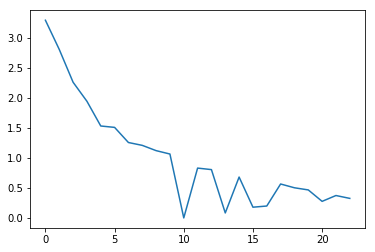

In [0]:
plt.plot(eig_val_cov)
plt.show()

In [0]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.14143245 0.12055336 0.09708093 0.08346739 0.0657801  0.06478642
 0.05396084 0.0519246  0.04815581] 
 0.7271419224669703


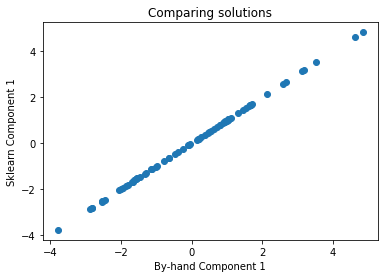

In [0]:
sklearn_pca = PCA(n_components=9)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_,
    '\n',
    sklearn_pca.explained_variance_ratio_.sum()
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

Above we can see that the first 9 components emcompass ~72% of the variance in the data set.

Given the scree plot above the first 9 components are going to be kept in the dataset.